In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import brewer2mpl
import json
import sys
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

%matplotlib inline

In [6]:
bmap = brewer2mpl.get_map("Set2", "qualitative", 7)                                                                                                                                                                                                                                                                          
colors = bmap.colors
Lcolors = colors[0:6]

for i in range(6):
    color = [i/255. for i in Lcolors[i]]
    Lcolors[i] = color


In [7]:
def HausdorffScore(cfs1, cfs2):
    """
    compute the modified Hausdorff score for measuring the consistency between two sets of counterfactual explanations.
    Arguments:
        cfs1: the first set of counterfactual explanations.
        cfs2: the second set of counterfactual explanations.
    returns: 
        modified Hausdorff distance between two sets.
    """
    cfs1, cfs2 = np.array(cfs1), np.array(cfs2)
    pairwise_distance = cdist(cfs1, cfs2)
    h_A_B = pairwise_distance.min(1).mean()
    h_B_A = pairwise_distance.min(0).mean()

    return max(h_A_B, h_B_A)

def stat(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    distance = []
    proximity = []
    sparsity = []
    aps = []

    num = data['num']
    cfs = data['cf']

    diversity_lists = np.array(data['diversity'])
    diversity_lists = diversity_lists[diversity_lists != -1]

    diversity2_lists = np.array(data['diversity2'])
    diversity2_lists = diversity2_lists[diversity2_lists != -1]
    print(f'div: {len(diversity_lists)} | div2: {len(diversity2_lists)}')
    for i in range(len(cfs)):
        cf_list = cfs[i]
        cf_data_list = []
        cf2_data_list = []
        for j in range(len(cf_list)):
            cf = cf_list[j]
            cf_data_list.extend(cf['cf'])
            cf2_data_list.extend(cf['cf2'])
            proximity.append(cf['proximity'])
            sparsity.append(cf['sparsity'])
            aps.append(cf['aps'])

        if len(cf_list) > 0:
            distance.append(HausdorffScore(cf_data_list, cf2_data_list))
    if len(diversity_lists) == 0:
        diversity_lists = [0.0]
    if len(diversity2_lists) == 0:
        diversity2_lists = [0.0]
    print(diversity_lists)
    return np.mean(distance), np.mean(proximity), np.mean(sparsity), np.mean(aps), np.mean(diversity_lists), np.mean(diversity2_lists)


def stat_cemsp(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    distance = []
    proximity = []
    sparsity = []
    aps = []

    num = data['num']
    cfs = data['cf']
    cf2 = data['cf2']

    diversity_lists = np.array(data['diversity'])
    diversity_lists = diversity_lists[diversity_lists != -1]

    diversity2_lists = np.array(data['diversity2'])
    diversity2_lists = diversity2_lists[diversity2_lists != -1]
    print(f'div: {len(diversity_lists)} | div2: {len(diversity2_lists)}')

    for i in range(len(cfs)):
        cf_list = cfs[i]
        cf_data_list = []
        for j in range(num[i]):
            cf = cf_list[j]
            cf_data_list.extend(cf['cf'])
            proximity.append(cf['proximity'])
            sparsity.append(cf['sparsity'])
            aps.append(cf['aps'])
        cf2_data_list = cf2[i]
        
        if len(cf_data_list) > 0 and len(cf2_data_list) > 0:
            distance.append(HausdorffScore(cf_data_list, cf2_data_list))
    if len(diversity_lists) == 0:
        diversity_lists = [0.0]
    if len(diversity2_lists) == 0:
        diversity2_lists = [0.0]
    print(diversity_lists)
    return np.mean(distance), np.mean(proximity), np.mean(sparsity), np.mean(aps), np.mean(diversity_lists), np.mean(diversity2_lists)

In [8]:
synthetic_gs = "../cfgen-update/synthetic/synthetic_growingsphere.json"
synthetic_cfproto = "../cfgen-update/synthetic/synthetic_cfproto1.json"
synthetic_plaincf = "../cfgen-update/synthetic/synthetic_plaincf.json"
synthetic_dice = "../cfgen-update/synthetic/synthetic_dice.json"
synthetic_sns = "../consistency/code/synthetic_sns_update.json"
synthetic_cemsp = "../cfgen-update/synthetic/synthetic_cemsp.json"

syn_distance_gs, syn_proximity_gs, syn_sparsity_gs, syn_aps_gs, syn_div_gs, syn_div2_gs = stat(synthetic_gs)
syn_distance_cfproto, syn_proximity_cfproto, syn_sparsity_cfproto, syn_aps_cfproto, syn_div_cfproto, syn_div2_cfproto = stat(synthetic_cfproto)
syn_distance_plaincf, syn_proximity_plaincf, syn_sparsity_plaincf, syn_aps_plaincf, syn_div_plaincf, syn_div2_plaincf = stat(synthetic_plaincf)
syn_distance_dice, syn_proximity_dice, syn_sparsity_dice, syn_aps_dice, syn_div_dice, syn_div2_dice = stat(synthetic_dice)
syn_distance_sns, syn_proximity_sns, syn_sparsity_sns, syn_aps_sns, syn_div_sns, syn_div2_sns = stat(synthetic_sns)
syn_distance_cemsp, syn_proximity_cemsp, syn_sparsity_cemsp, syn_aps_cemsp, syn_div_cemsp, syn_div2_cemsp = stat_cemsp(synthetic_cemsp)

div: 495 | div2: 495
[7.42958885e-02 1.65467899e-01 1.63456273e-02 4.54828651e-01
 5.98840404e-02 2.24957621e-01 9.75498216e-02 1.10353329e+00
 1.09410477e-02 7.72855022e-03 8.21790653e-01 7.21814477e-01
 7.90684711e-03 2.81533134e-02 1.86441701e-01 3.40742697e-02
 1.71337941e-03 1.51825473e-01 3.35030739e-01 8.97812082e-02
 9.90667019e-03 5.58357819e-01 1.60735773e+00 1.13929136e-01
 1.23536872e-02 2.00915918e-01 4.22855050e-02 6.37863524e-02
 4.95472144e-02 3.45881384e-01 3.74771871e-02 6.45587238e-02
 7.54123973e-01 4.22312372e-02 5.90351290e-02 2.04500188e-02
 3.31513615e-01 2.28311352e+00 2.74933236e-01 9.88190700e-04
 1.79679226e-02 7.85038552e-02 2.08157422e-02 5.04063755e-01
 2.10312728e-02 1.38092424e+00 3.81684599e-01 1.75233473e-03
 1.35883194e+00 8.83452819e-03 3.18090418e-01 5.45476966e-03
 2.99104499e-01 1.42203913e-02 5.43363371e-02 5.40745716e-02
 2.82769716e+00 5.87826181e-03 9.37870344e-03 4.59258304e-02
 2.55813845e-02 8.91207621e-02 5.58619002e-02 1.89776112e+00
 3.

In [9]:
thyroid_gs = "../cfgen-update/thyroid/thyroid_growingsphere.json"
thyroid_cfproto = "../cfgen-update/thyroid/Thyroid_cfproto.json"
thyroid_plaincf = "../cfgen-update/thyroid/thyroid_plaincf.json"
thyroid_dice = "../cfgen-update/thyroid/thyroid_dice.json"
thyroid_sns = "../consistency/code/thyroid_sns_update.json"
thyroid_cemsp = "../cfgen-update/thyroid/thyroid_cemsp.json"

thyroid_distance_gs, thyroid_proximity_gs, thyroid_sparsity_gs, thyroid_aps_gs, thyroid_div_gs, thyroid_div2_gs = stat(thyroid_gs)
thyroid_distance_cfproto, thyroid_proximity_cfproto, thyroid_sparsity_cfproto, thyroid_aps_cfproto, thyroid_div_cfproto, thyroid_div2_cfproto = stat(thyroid_cfproto)
thyroid_distance_plaincf, thyroid_proximity_plaincf, thyroid_sparsity_plaincf, thyroid_aps_plaincf, thyroid_div_plaincf, thyroid_div2_plaincf = stat(thyroid_plaincf)
thyroid_distance_dice, thyroid_proximity_dice, thyroid_sparsity_dice, thyroid_aps_dice, thyroid_div_dice, thyroid_div2_dice = stat(thyroid_dice)
thyroid_distance_sns, thyroid_proximity_sns, thyroid_sparsity_sns, thyroid_aps_sns, thyroid_div_sns, throid_div2_sns = stat(thyroid_sns)
thyroid_distance_cemsp, thyroid_proximity_cemsp, thyroid_sparsity_cemsp, thyroid_aps_cemsp, thyroid_div_cemsp, thyroid_div2_cemsp = stat_cemsp(thyroid_cemsp)

div: 0 | div2: 0
[0.0]
div: 0 | div2: 0
[0.0]
div: 0 | div2: 0
[0.0]
div: 0 | div2: 0
[0.0]
div: 0 | div2: 0
[0.0]
div: 0 | div2: 0
[0.0]


In [10]:
hepatitis_gs = "../cfgen-update/hepatitis/Hepatitis_growingsphere.json"
hepatitis_cfproto = "../cfgen-update/hepatitis/Hepatitis_cfproto.json"
hepatitis_plaincf = "../cfgen-update/hepatitis/Hepatitis_plaincf.json"
hepatitis_dice = "../cfgen-update/hepatitis/Hepatitis_dice.json"
hepatitis_sns = "../consistency/code/hepatitis_sns_update.json"
hepatitis_cemsp = "../cfgen-update/hepatitis/Hepatitis_cemsp.json"


hepatitis_distance_gs, hepatitis_proximity_gs, hepatitis_sparsity_gs, hepatitis_aps_gs, hepatitis_div_gs, hepatitis_div2_gs = stat(hepatitis_gs)
hepatitis_distance_cfproto, hepatitis_proximity_cfproto, hepatitis_sparsity_cfproto, hepatitis_aps_cfproto, hepatitis_div_cfproto, hepatitis_div2_cfproto = stat(hepatitis_cfproto)
hepatitis_distance_plaincf, hepatitis_proximity_plaincf, hepatitis_sparsity_plaincf, hepatitis_aps_plaincf, hepatitis_div_plaincf, hepatitis_div2_plaincf = stat(hepatitis_plaincf)
hepatitis_distance_dice, hepatitis_proximity_dice, hepatitis_sparsity_dice, hepatitis_aps_dice, hepatitis_div_dice, hepatitis_div2_dice = stat(hepatitis_dice)
hepatitis_distance_sns, hepatitis_proximity_sns, hepatitis_sparsity_sns, hepatitis_aps_sns, hepatitis_div_sns, hepatitis_div2_sns = stat(hepatitis_sns)
hepatitis_distance_cemsp, hepatitis_proximity_cemsp, hepatitis_sparsity_cemsp, hepatitis_aps_cemsp, hepatitis_div_cemsp, hepatitis_div2_cemsp = stat_cemsp(hepatitis_cemsp)

div: 13 | div2: 13
[1.17670065 0.58659212 1.51732206 3.39166    2.34734005 4.85204192
 0.29367555 6.57629375 0.03480188 0.98636058 1.81882692 4.62023089
 3.50873697]
div: 14 | div2: 14
[0.17453744 1.79992684 0.39690745 2.65439283 1.60370976 1.45388781
 0.97688485 0.33086172 2.12282218 1.26087006 1.42531125 2.25404945
 1.56546824 1.60923507]
div: 14 | div2: 14
[1.85060993 1.70692593 2.28114264 3.42995674 3.47484092 1.59732857
 1.82917192 1.93918786 3.64017269 5.05555408 3.52740956 3.41891408
 3.19964655 3.4919396 ]
div: 14 | div2: 14
[2.44831244 2.24564858 3.66543097 4.06911324 3.5769847  1.52048004
 1.53890486 2.77815527 3.07281653 3.88813884 3.61047366 1.1713668
 3.37411808 1.57357586]
div: 13 | div2: 13
[0.8431685  0.01921026 0.45786121 0.1104447  0.1438494  0.07140412
 0.18649603 0.60620734 0.03063271 0.61057744 0.12314296 0.11715494
 0.27604792]
div: 14 | div2: 8
[0.3479232  0.99162028 0.64878642 1.29409889 1.37392857 0.32595695
 1.18887759 0.49695171 1.16073643 1.83811632 0.827613

In [11]:
xaxis_label = ["GS", "PlainCF", "DiCE","CFProto", "SNS", "CEMSP"]
xtick = np.arange(6)

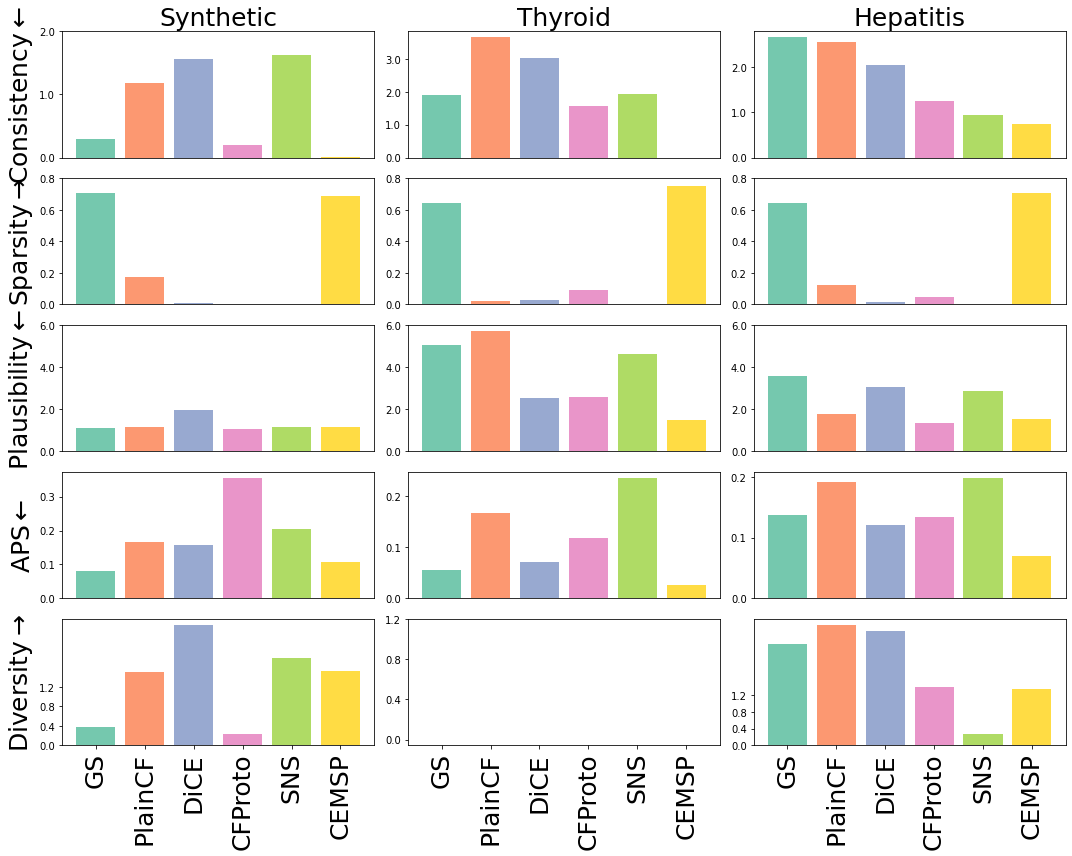

In [12]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(5, 3, figsize=(15, 12))
plt.rcParams['xtick.labelsize']= 20
plt.rcParams['ytick.labelsize']= 20
# plt.rcParams["figure.figsize"] = (15, 20)

alpha = 0.9
fontsize = 25

axs[0, 0].bar(xtick,  [syn_distance_gs, syn_distance_plaincf, syn_distance_dice,  syn_distance_cfproto, syn_distance_sns, syn_distance_cemsp], color=Lcolors, alpha = alpha)
axs[0, 1].bar(xtick,  [thyroid_distance_gs, thyroid_distance_plaincf, thyroid_distance_dice,  thyroid_distance_cfproto, thyroid_distance_sns, thyroid_distance_cemsp], color=Lcolors, alpha = alpha)
axs[0, 2].bar(xtick,  [hepatitis_distance_gs, hepatitis_distance_plaincf, hepatitis_distance_dice,  hepatitis_distance_cfproto, hepatitis_distance_sns, hepatitis_distance_cemsp], color=Lcolors, alpha = alpha)


axs[1, 0].bar(xtick,  [syn_sparsity_gs, syn_sparsity_plaincf, syn_sparsity_dice,  syn_sparsity_cfproto, syn_sparsity_sns, syn_sparsity_cemsp], color=Lcolors, alpha = alpha)
axs[1, 1].bar(xtick,  [thyroid_sparsity_gs, thyroid_sparsity_plaincf, thyroid_sparsity_dice,  thyroid_sparsity_cfproto, thyroid_sparsity_sns, thyroid_sparsity_cemsp], color=Lcolors, alpha = alpha)
axs[1, 2].bar(xtick,  [hepatitis_sparsity_gs, hepatitis_sparsity_plaincf, hepatitis_sparsity_dice,  hepatitis_sparsity_cfproto, hepatitis_sparsity_sns, hepatitis_sparsity_cemsp], color=Lcolors, alpha = alpha)

axs[2, 0].bar(xtick,  [syn_proximity_gs, syn_proximity_plaincf, syn_proximity_dice,  syn_proximity_cfproto, syn_proximity_sns, syn_proximity_cemsp], color=Lcolors, alpha = alpha)
axs[2, 1].bar(xtick,  [thyroid_proximity_gs, thyroid_proximity_plaincf, thyroid_proximity_dice,  thyroid_proximity_cfproto, thyroid_proximity_sns, thyroid_proximity_cemsp], color=Lcolors, alpha = alpha)
axs[2, 2].bar(xtick,  [hepatitis_proximity_gs, hepatitis_proximity_plaincf, hepatitis_proximity_dice,  hepatitis_proximity_cfproto, hepatitis_proximity_sns, hepatitis_proximity_cemsp], color=Lcolors, alpha = alpha)

axs[3, 0].bar(xtick,  [syn_aps_gs, syn_aps_plaincf, syn_aps_dice,  syn_aps_cfproto, syn_aps_sns, syn_aps_cemsp], color=Lcolors, alpha = alpha)
axs[3, 1].bar(xtick,  [thyroid_aps_gs, thyroid_aps_plaincf, thyroid_aps_dice,  thyroid_aps_cfproto, thyroid_aps_sns, thyroid_aps_cemsp], color=Lcolors, alpha = alpha)
axs[3, 2].bar(xtick,  [hepatitis_aps_gs, hepatitis_aps_plaincf, hepatitis_aps_dice,  hepatitis_aps_cfproto, hepatitis_aps_sns, hepatitis_aps_cemsp], color=Lcolors, alpha = alpha)

axs[4, 0].bar(xtick,  [syn_div_gs, syn_div_plaincf, syn_div_dice,  syn_div_cfproto, syn_div_sns, syn_div_cemsp], color=Lcolors, alpha = alpha)
axs[4, 1].bar(xtick,  [thyroid_div_gs, thyroid_div_plaincf, thyroid_div_dice,  thyroid_div_cfproto, thyroid_div_sns, thyroid_div_cemsp], color=Lcolors, alpha = alpha)
axs[4, 2].bar(xtick,  [hepatitis_div_gs, hepatitis_div_plaincf, hepatitis_div_dice,  hepatitis_div_cfproto, hepatitis_div_sns, hepatitis_div_cemsp], color=Lcolors, alpha = alpha)

# Set Ylabel
axs[0,0].set_ylabel(r"Consistency$\leftarrow$", fontsize = fontsize)
axs[1,0].set_ylabel(r"Sparsity$\rightarrow$", fontsize = fontsize)
axs[2,0].set_ylabel(r"Plausibility$\leftarrow$", fontsize = fontsize)
axs[3,0].set_ylabel(r"APS$\leftarrow$", fontsize = fontsize)
axs[4,0].set_ylabel(r"Diversity$\rightarrow$", fontsize = fontsize)
# axs[5,0].set_ylabel(r"Div2$\rightarrow$", fontsize = fontsize)

# Set Title
axs[0,0].set_title(r'Synthetic', fontsize = fontsize)
axs[0,1].set_title(r'Thyroid', fontsize = fontsize)
axs[0,2].set_title(r'Hepatitis', fontsize = fontsize)

# Set X tick
axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])
axs[2, 0].set_xticks([])
axs[2, 1].set_xticks([])
axs[2, 2].set_xticks([])
axs[3, 0].set_xticks([])
axs[3, 1].set_xticks([])
axs[3, 2].set_xticks([])

axs[4,0].set_xticks(xtick)
axs[4,0].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)
axs[4,1].set_xticks(xtick)
axs[4,1].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)
axs[4,2].set_xticks(xtick)
axs[4,2].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)

# Set Y limit
axs[0,0].set_yticks(np.arange(0, 2.3, 1))
axs[0,1].set_yticks(np.arange(0, 3.3, 1))
axs[0,2].set_yticks(np.arange(0, 2.3, 1))

axs[1,0].set_yticks(np.arange(0, 0.82, 0.2))
axs[1,1].set_yticks(np.arange(0, 0.82, 0.2))
axs[1,2].set_yticks(np.arange(0, 0.82, 0.2))


axs[2,0].set_yticks(np.arange(0, 6.2, 2))
axs[2,1].set_yticks(np.arange(0, 6.2, 2))
axs[2,2].set_yticks(np.arange(0, 6.2, 2))


axs[3,0].set_yticks(np.arange(0, 0.37, 0.1))
axs[3,1].set_yticks(np.arange(0, 0.27, 0.1))
axs[3,2].set_yticks(np.arange(0, 0.27, 0.1))

#需要调整
axs[4,0].set_yticks(np.arange(0, 1.3, 0.4))
axs[4,1].set_yticks(np.arange(0, 1.3, 0.4))
axs[4,2].set_yticks(np.arange(0, 1.3, 0.4))

axs[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[4,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[4,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[4,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.tight_layout()
plt.savefig("experiments43-model-update-bar.pdf", dpi = 1200, bbox_inches = 'tight')
plt.show()